In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
##(Data Import and Cleaning)--Import the CSV file
df = pd.read_csv("palmer_penguins.csv")
df #looking into the test case to see how it is and if everyting works 

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


##Data Import and Cleaning

In the next section, the data will be cleaned up based on what we want to focus on. This is to ensure that we are focusing on proper data that can be used to train the model.

In [9]:
##(Data Import and Cleaning)--#split data before being cleaned with a test size of 0.4 and a random state of 2021. 
'''
Splitting the data is important to ensure that training and test data is separated properly to see how good the model is at predicting s
species data
'''
train_df, test_df = train_test_split(df, test_size=0.4, random_state=2021, stratify=df['Species'])
#adding stratify here based on species to ensure that there is an equal amount of differences between the training and test data because 
#chinstrap penguins are underrepresented. This was explored through figure 3 of Exploratory Analysis.


In [10]:
##(Data Import and Cleaning)--create a clean function, that is used to drop the NAN values in the relevant features
'''
This is the clean_data function which aims to replace all values such a NAN or other miscleannous values from the dataset so we can have a cleaned data set to create
figures with.
'''
def clean_data(data):
    data['Sex'] = data['Sex'].replace('.', np.nan)
    #this was done to just get rid of the . placeholders
    cleaned = data.dropna(subset=['Species', 'Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'])
    
    cleaned = cleaned
    return cleaned #

#run function to get the cleaned and test datasets
train_clean = clean_data(train_df)
test_clean = clean_data(test_df)

##Exploratory Analysis

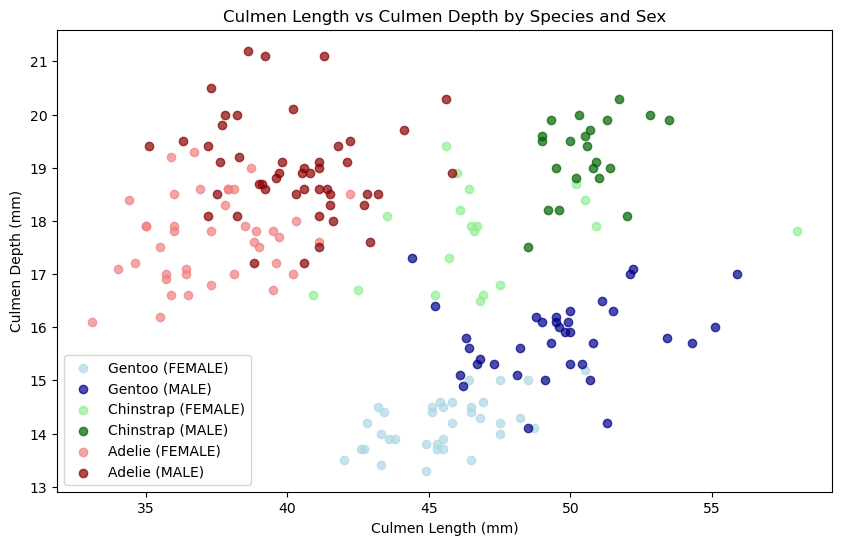

In [12]:
##(Exploratory Analysis)--First figure that demonstrates the relationship between the Culmen length, Culmen Depth, Sex and how they vary based on species
'''
The function creates a map that holds the colors and plots each unique species through a double for loop per each sex of the penguins.
This is done through a scatter plot that has 0 if sex = female and 1 for male
'''
species_colors = {'Adelie': ['lightcoral', 'darkred'],'Gentoo': ['lightblue', 'darkblue'],'Chinstrap': ['lightgreen', 'darkgreen']}

plt.figure(figsize=(10, 6))
# Defined color scheme for each species
#want to create a dictionary so that its easier to see each Specie's based on binary values based on sex
# Plot each species with its own color pair
for species in train_clean['Species'].unique(): #each unique species
    for sex in train_clean['Sex'].unique(): #second for loop that goes through each for loop 
        #create a map for the sex of the species
        mask = (train_clean['Species'] == species) & (train_clean['Sex'] == sex)
        color = species_colors[species.split()[0]][0 if sex == 'FEMALE' else 1]
        plt.scatter(train_clean[mask]['Culmen Length (mm)'], 
                   #wanted to create a mask that would just label it based on 
                    #sex and culmen depth
                    
                    train_clean[mask]['Culmen Depth (mm)'],
                   label=f'{species.split()[0]} ({sex})',
                   color=color, #saved color based 
                    #on species
                   alpha=0.7)

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs Culmen Depth by Species and Sex')
plt.legend()
plt.show()

Explanation:
This model uses a scatterplot where each species is assigned a color, and the data is also divided by sex (male and female). A scatter plot is  used with so we can see that there is a relationship between the Culmen Length, Culmen Depth for different Sexes.It reveals clear clustering patterns between sexes and species, showcasing that these features might end up being significant predictors for identifying the penguin species. Because of that, and the clear clustering being seen between the different species, it can be seen that these three features may be useful to use this data to create a model. 

Additionally, this model showcases that there is a clustering for all species with males having a larger depth and length than females in terms of their culmen. Because of this visualization, for the actual decision regions, filtering each model's decision regions based on Sex is not necessary as they do seem to be clustering in the same place.

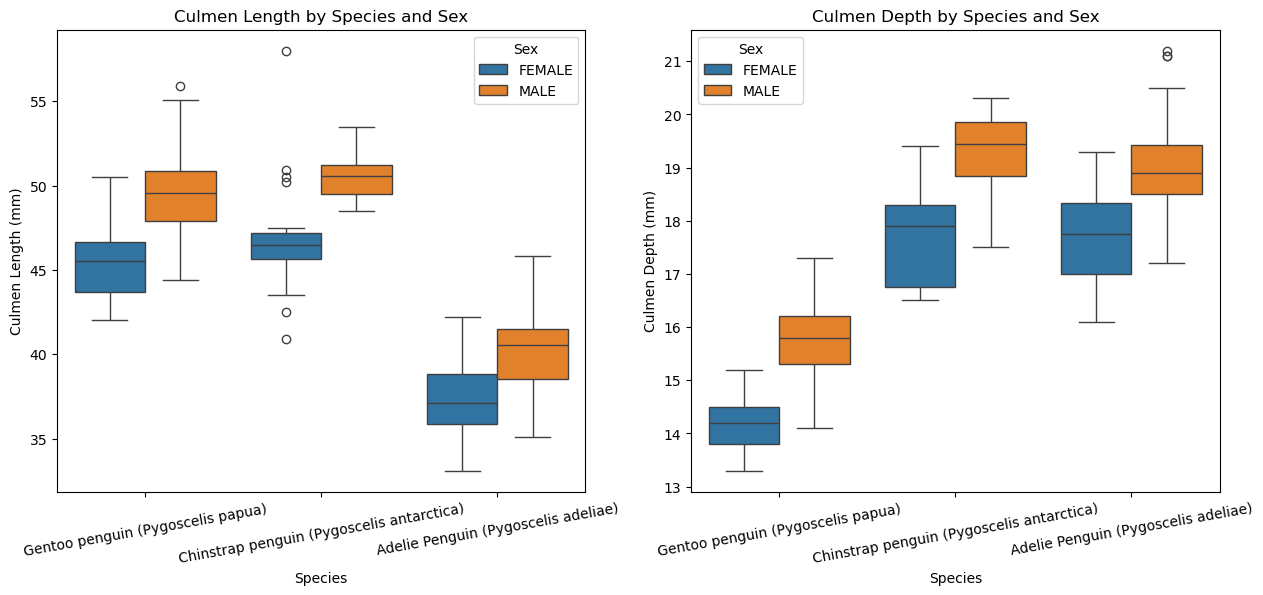

In [14]:
##(Exploratory Analysis)--Second figure that demonstrates the relationship between the Culmen length, Culmen Depth, Sex and how they vary based on the species on two different axes 
'''
This function creates two different subplots that showcase how the Culmen Length varies by Sex and the Culmen Depth by Sex
'''
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) #want to create more dimensions

#the left subplot is the Culmen Length by Species and the sex
sns.boxplot(data=train_clean, x='Species', y='Culmen Length (mm)', 
            hue='Sex', ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=10)
#the right subplot is the Culmen Depth distribution by species and Sex
sns.boxplot(data=train_clean, x='Species', y='Culmen Depth (mm)', 
            hue='Sex', ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=10)
axes[0].set_title('Culmen Length by Species and Sex')
axes[1].set_title('Culmen Depth by Species and Sex')
plt.show()

Explanation: 
For this model, a boxplot is used so we can see the deviations, and how different features differ by species. The figure uses two separate axes: one for Culmen Length and one for Culmen Depth, with data grouped by species and divided by sex (Male/Female). These boxplots basically showcase how Culmen Length and Culmen Depth are able to vary across various penguin Species and Sex. They showcase distinct distributions for each combination.They showcase that there is a stark difference between the Culmen Length, Culmen Depth, and Sex in the species. This showcases the predictive power of the features in the model.  

<Figure size 1000x600 with 0 Axes>

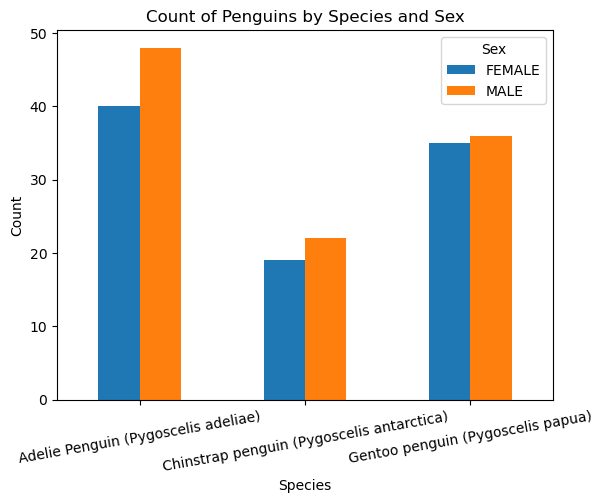

In [16]:
##(Exploratory Analysis)--Third figure that saves all the counts of of the species and the sex of the species. This is important because it shows how the values are being held
'''
This plot is a bar chart that saves the counts of each speices and is just done through getting the counds of each value
'''
plt.figure(figsize=(10, 6))

species_sex_count = train_clean.groupby(['Species', 'Sex']).size().unstack() 
#uses unstack because the index values make the counting hard to understand, 
#before without it, it was hard to understand and compare the differences between the values
species_sex_count.plot(kind='bar')
plt.title('Count of Penguins by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Count')

plt.xticks(rotation=10) #this just again changes the rotation

plt.legend(title='Sex')
plt.show()

Explanation:  
The third figure shows the count of penguins for each species (Adelie, Chinstrap, Gentoo),  separated by sex (Male and Female) using a bar chart. We counted the sex values to check if any species is over or underrepresented, allowing us to account for these imbalances when building a model. This is because it is important to see the count is for each species.  This chart was helpful for understanding the distribution across the groups. This is important to ensure that no species is overrepresented which might bias the model's predictions.

In [18]:
##(Exploratory Analysis)--Table that uses df.groupby that serves as the summarize the quantiative data over qualitative data
'''
Run two different statistics on Sex and Island to see which one has more variation. This is because the one that has more
distinction between the two will be more powerful at predicting values
'''
summary_stats_Sex = train_clean.groupby(['Species', 'Sex']).agg({ #Used Sex as our qualitative variable
    'Culmen Length (mm)': ['mean', 'std'],
    'Culmen Depth (mm)': ['mean', 'std']
})
summary_stats_Island = train_clean.groupby(['Species', 'Island']).agg({ #Used Island as our qualitative variable
    'Culmen Length (mm)': ['mean', 'std'],
    'Culmen Depth (mm)': ['mean', 'std']
})
print(summary_stats_Sex)
print(summary_stats_Island)

                                                 Culmen Length (mm)            \
                                                               mean       std   
Species                                   Sex                                   
Adelie Penguin (Pygoscelis adeliae)       FEMALE          37.290000  2.076215   
                                          MALE            40.229167  2.275583   
Chinstrap penguin (Pygoscelis antarctica) FEMALE          46.973684  3.638199   
                                          MALE            50.536364  1.268124   
Gentoo penguin (Pygoscelis papua)         FEMALE          45.508571  1.984998   
                                          MALE            49.541667  2.681511   

                                                 Culmen Depth (mm)            
                                                              mean       std  
Species                                   Sex                                 
Adelie Penguin (Pygoscelis adelia

Explanation: 
This table showcases the Mean and STD of Culmen Length/Depth by Sex and island for each species. It highlights the variations in measurments and also showcases that the measurments are close but similar across Sex than island. However, taken into consideration the other two graphs in the EDA and that the differences are minimal, it can be seen that Sex and the std/mean of the Culmen Length/Depth values are a stronger predictor. By comparing both of them, it allows for an easier understanding of the differences between each qualitative variable.

##Feature Selection
 For the models, we chose to use Sex(Qualitative), Culmen Length(Quantiative), and Culmen Depth(Quantiative). These features were chosen through 
    the Exploratory Data Analysis, which showcased that there was a clear distinction between species with these features that would make the model
    a strong predictor.
Feature 1:(Sex)
        - In the Boxplot and Scatterplot analyses, it was seen that there were significant variations in Culmen Length/Culmen Depth
        between males and females per species.
        - In the summary statistics table, it can be seen that the standard deviation across Sex is similarly pronounced to island, which means that Sex is a strong predictor of species differentiation as it is still large and compared with the other graphs showcases the same values.

Feature 2:(Culmen Length)
     - The scatter plot and summary statistic table showcases that Culmen length varies significantly between species, which means that there
        are distinct separations between the species and the Sex
     - Because of the size differences among different species, that means that Culmen Length would be a strong indicator of their identity.
Feature 3:(Culmen Depth)
        - The Culmen Depth variable showcases significant variation across both the Sexes and the species, similarly to the Culmen length feature, which means that it is likely to be a powerful predictor in species.
        - Combined with Culmen Length and Sex, which are also both distinct features in the EDA, it serves as a way to ehance the model's ability to classify species.
    
Conclusion: For our model, we picked Sex as the qualitative feature and Culmen Length and Culmen Depth as the quantitative features. 
    From the earlier analysis, it was clear that males and females have noticeable differences in their culmen measurements across species, 
    so adding sex as a feature helps capture that variability. Culmen length and depth stood out in the scatterplot since they clearly grouped the species—culmen length separated Gentoo penguins, while culmen depth helped distinguish Adelie penguins. These features also make sense  biologically, as they reflect real differences in the penguins’ physical traits, which are linked to their species. This combination feels like the most straightforward and useful set of features for classification. Furthermore, the fetures have a strong connection to the target variable (species) and don’t overlap much between groups, which makes them reliable for predictions. While we could have used automated methods, the visualizations made it clear why these features are a good choice. All the selection was done only on the training set to avoid bias and make sure the model works well on new data.

##Modeling

Overview:
Modeling in machine learning is based on training a predictive algorithm on the data to identify patterns and make decisions or predictions on new data. This process also uses the hyperparameter tuning. The fit function below helps train the machine model based on the training data through cross validation. The GridSearchCV import allows for different combinations to be tested on the training data to find the best combination. Once we get the best value, we run the predict method which will determine how it works on new data. This is then translated in the percentage form by the accuracy form function. The confusion matrix also is saved, which summarizes how many false positives and negatives that the model might have.

Three Model Review:

1. K-Nearest Neighbors(KNN), which is a model that classifies the data based on the regression value of the nearest K neighbors, using a distance metric like Manhattan distance. It groups a value based on the nieghbords and uses a majority vote system to classify a data point. This algorithm is easy to use without too much tuning to the parameters.

2. Multinomial Regression is logistic regression that is used for multi-class classification, where it models the probability through linear relationships between the features and the target values. 

3. Random Forest combines multiple decsions trees, that are trained on random subsets to make preidictions. The strength of this algorithm lies in its ability to handle very complex relationships while still maintaing high accuracy. 

In [22]:
##(Data Import and Cleaning)--Prepping data by performing the cleaning operation again 
'''
Here we  call the clean function from above. We want to keep the this data as our training and testing data for our model
This is built upon the data gained above by using the stratify function for testing and also using labelEncoder to help make it easier to test
'''
train_df, test_df = train_test_split(df, test_size=0.4, random_state=123, stratify=df['Species'])
#adding stratify here based on species to ensure that there is an equal amount of differences between the training and test data because 
#chinstrap penguins are underrepresented
le_species = LabelEncoder()
le_sex = LabelEncoder()
#running the clean data function from above so you don't pollute the training set
train_df = clean_data(train_df)
test_df = clean_data(test_df)

#Creating a dataframe is not a necessary step as the clean_data() function takes care of it, but this is helpful to visualize what the
#models will be trained on, and serves as an extra step to ensure that our model has the right data.
X_train = pd.DataFrame({
    'Culmen Length (mm)': train_df['Culmen Length (mm)'],
    'Culmen Depth (mm)': train_df['Culmen Depth (mm)'],
    'Sex_encoded': le_sex.fit_transform(train_df['Sex'])#This turns the qualitative values of MALE and FEMALE to binary values that can be used to help
    #calculate the model
})

y_train = le_species.fit_transform(train_df['Species'])#This turns the qualitative values of Species to binary values that can be used to help
    #calculate the model
X_test = pd.DataFrame({
    'Culmen Length (mm)': test_df['Culmen Length (mm)'],
    'Culmen Depth (mm)': test_df['Culmen Depth (mm)'],
    'Sex_encoded': le_sex.transform(test_df['Sex']) #This turns the qualitative values of MALE and FEMALE to binary values that can be used to help
    #calculate the model
})
y_test = le_species.transform(test_df['Species']) #This turns the qualitative values of Species to binary values that can be used to help
    #calculate the model

Score: 0.985

Best Parameters:
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}


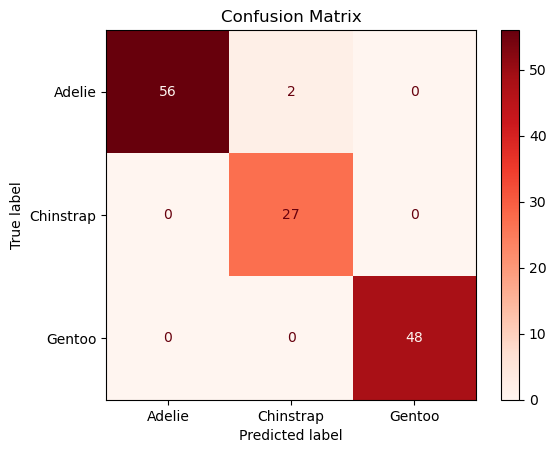

Score: 0.985

Best Parameters:
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
[[56  2  0]
 [ 0 27  0]
 [ 0  0 48]]


In [23]:
##(Modeling):First nearest-neighbor classifiers algorithm from Sci-kitlearn
Tuning = {'n_neighbors': [10,15,20], 'weights': ['uniform'],'metric': ['manhattan']}
#Using theGridsearchCV, which uses the tuning parameters from scikit learn and allows cross validation to be done with K-folds
grid_search = GridSearchCV(KNeighborsClassifier(), Tuning, cv=5)
grid_search.fit(X_train, y_train) 
best_knn = grid_search.best_estimator_ #gets the best estimated value  
y_pred = best_knn.predict(X_test) 
#print statements-> The accuracy score just gives the percentage

print(f"Score: {accuracy_score(y_test, y_pred):.3f}\n")
print("Best Parameters:")
print(grid_search.best_params_) #GridSearchCV function that is helpful in returning back with parameters worked

#Code used to print the confusion Matrix with labels
species_names = ['Adelie', 'Chinstrap','Gentoo']
C = ConfusionMatrixDisplay(confusion_matrix = (confusion_matrix(y_test, y_pred)), display_labels=species_names)
C.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

Tuning = {'n_neighbors': [10,15,20], 'weights': ['uniform'],'metric': ['manhattan']}
#Using theGridsearchCV, which uses the tuning parameters from scikit learn a
grid_search = GridSearchCV(KNeighborsClassifier(), Tuning, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_ #gets the best estimated value
y_pred = best_knn.predict(X_test)
print(f"Score: {accuracy_score(y_test, y_pred):.3f}\n")
print("Best Parameters:")
print(grid_search.best_params_) #GridSearchCV function that is helpful in re
print(confusion_matrix(y_test, y_pred))

Explanation:

Why GridSeachCV is used: Gridsearch is used beacuse it allows the code to try out all the tuning parameters and pick the best one versus manually checking each value for cross validation checking.
Check documentation for more information on GridSearchCV: https://scikilearn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

Discussion: 
The KNN model performed well, with an accuracy of 98.5% on the test set, showing it can classify penguins effectively using Culmen Length, Culmen Depth, and Sex. The best parameters for this model was calculating everything through manhattan distance and checking the nearest 3 neighbors with a uniform weight. KNN works by creating non-linear regions and while it looks like this is working for more distinct regions like the Gentoo region, it fails when the regions are overlapping. I think that this could be improved by adding a different way to calculate the weights, because it being uniform right now means that every point next to it is weighed the same, but if it is an outlier and is next to another species, then it may be classified wrong. This can also be seen in the confusion matrix  as it says that there are 3 false negatives in between row 1 and row 2, which are between Adelie and Chinstrap penguins, which have more outliers that are mixed.

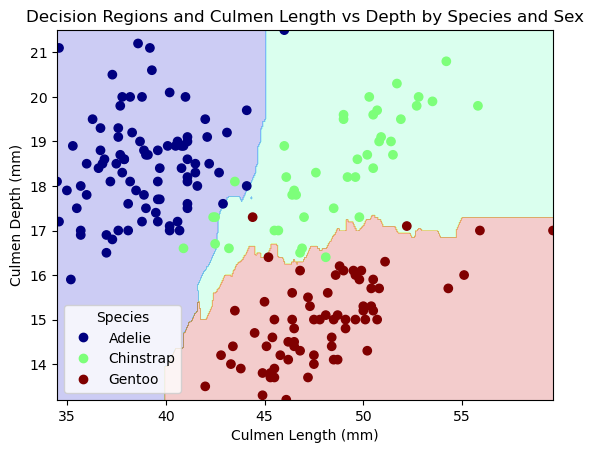

In [25]:
##(Modeling): Plotting Region part of Modeling function
'''
This function is used to help visualize the decision regions by the classifier and overlay the data points for comparision/
The goal of this is to fit the classifier to the data and create a grid of points that span the range of the features and create a 
filled countour plot
'''
species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
def plot_regions(c, X, y, species_names): #taken from lecture
    c.fit(X, y)
    x0 = X["Culmen Length (mm)"]
    x1 = X["Culmen Depth (mm)"]
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    XX = xx.ravel()
    YY = yy.ravel()
    grid_df = pd.DataFrame({"Culmen Length (mm)": XX,"Culmen Depth (mm)": YY})
    p = c.predict(grid_df).reshape(xx.shape)
    fig, ax = plt.subplots(1)
    ax.contourf(xx, yy, p, cmap="jet", alpha=.2)
    scatter = ax.scatter(x0, x1, c=y, cmap="jet")
    #setting scatter equal to that to help classify the species on a legend
    ax.set(xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")
    ax.set_title('Decision Regions and Culmen Length vs Depth by Species and Sex')
    #this will get most of the values, but now we need to set up a way to ensure that we can see the values
    
    
    
    
    h, _ = scatter.legend_elements() #get the various elements in the scatter plot, need to use, for more understanding check documentation listed below
    #the _ to basically negate the other elements which is the actual names from the scatter plot because we don't need to show them 
    labels = [species_names[int(value)] for value in np.unique(y)] #calls the species mapping from above that we made to help put labels on them
    ax.legend(h, labels, title="Species")
    plt.show()
    
plot_regions(best_knn, X_train[['Culmen Length (mm)', 'Culmen Depth (mm)']], y_train, species_names = species_mapping)
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
#Explanation of Sex in plots seen in Figure 1 of EDA

Test Accuracy: 0.992

Confusion Matrix:
Best Parameters:
{'C': 1, 'multi_class': 'multinomial'}


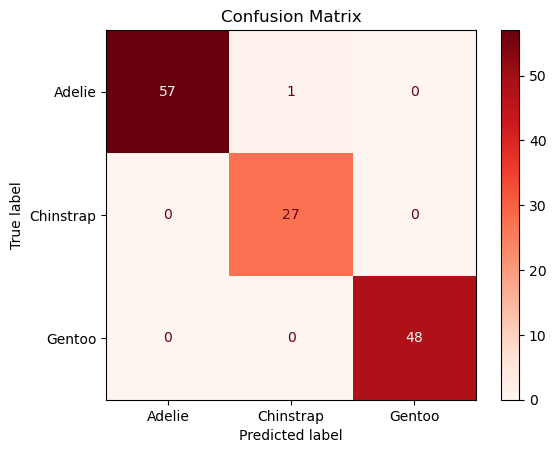

In [26]:
##(Modeling):multinomial logistic regression from Scikit learn 
param_grid = {'C': [ 1, 10, 100],'multi_class': ['multinomial']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=123), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
#print statements-> The accuracy score just gives the percentage
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print("Confusion Matrix:")
print("Best Parameters:")
print(grid_search.best_params_)
#uses confusionmatrixdisplay to write out the confusion matrix and display what species have false positives and true positives
C = ConfusionMatrixDisplay(confusion_matrix = (confusion_matrix(y_test, y_pred)), display_labels=species_names)
C.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

Discussion:
The logistic regression model performed well, achieving an accuracy of 99.2% on the test set, showing it’s effective for this dataset. The best Parameters for this was a C value of 10 and a multinomial model. It uses Culmen Length, Culmen Depth, and Sex to classify species, and its confusion matrix highlights similar issues as the KNN model, particularly with misclassifying all the penguins due to overlapping features.
This model could be failing because of the overlapping distributions for Culmen Length and Culmen Depth. Ths might be because logitistc regression is using sharp lines because the decision boundaries are linear, so features that might be outliers in one species might not be properly captured like this. The confusion matrix here shows that there are 3 misclassifications between the three penguins, but there isn't a large amount of misclassification in comparision to KNN.

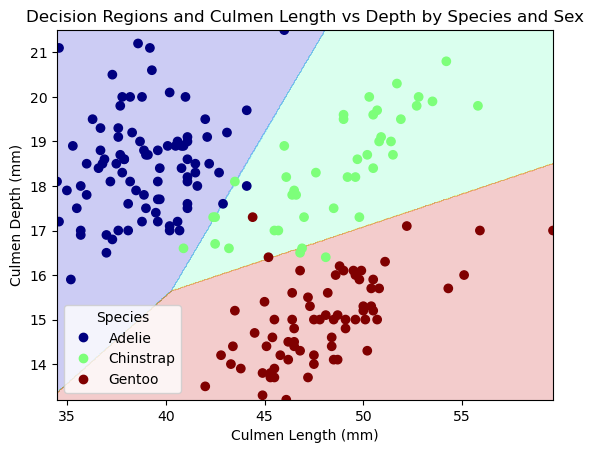

In [28]:
plot_regions(best_lr, X_train[['Culmen Length (mm)', 'Culmen Depth (mm)']], y_train, species_names = species_mapping)

Test Accuracy: 0.992

Best Parameters:
{'max_depth': 5, 'n_estimators': 35}


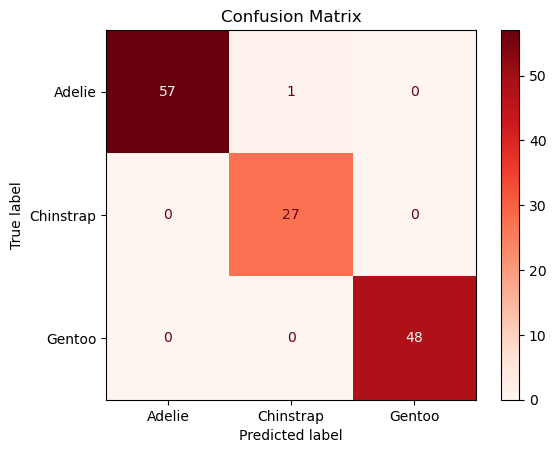

In [29]:
##(Modeling):multinomial Random Forest from Scikit learn 
param_grid = {'n_estimators': [3,15,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49],'max_depth': [3, 5, 7, 10,13,15]}
#because the values of the Random Forest Classifiers can vary a lot, I generated it up all the way to 50.
grid_search = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
#print statements-> The accuracy score just gives the percentage

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")


print("Best Parameters:")
print(grid_search.best_params_)
C = ConfusionMatrixDisplay(confusion_matrix = (confusion_matrix(y_test, y_pred)), display_labels=species_names)
C.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

Discussion: 
This model performed better than both the KNN model and the same as the Logistic model, with a score of 99.2%. The best parameters for this model were a max depth of 5 and around 35 for the number of estimators. Looking at the Confusion Matrix and the Decesion regions, it looks like 3 values were misclassified, it looks like there is an  amount of overlap between the Culmen Length and the Culmen Depth between species whcih is causing this misclassification. Increasing the tree depth could prevent these false negatives and make the boundary regions more precise. There seems to be the most amount of misclassification that happened between the Gentoo and the Adelie penguins.

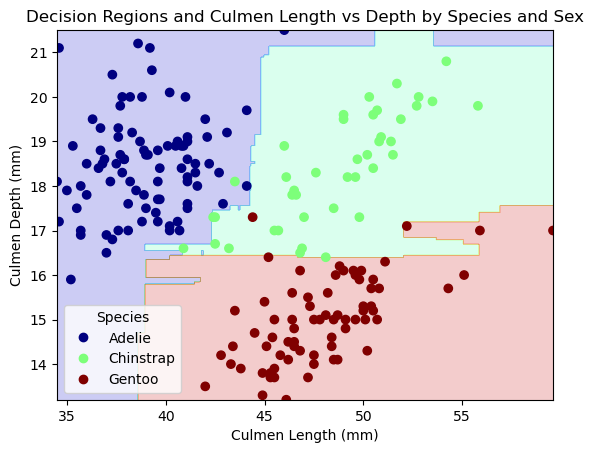

In [31]:
plot_regions(best_rf, X_train[['Culmen Length (mm)', 'Culmen Depth (mm)']], y_train, species_names = species_mapping)

##Discussion:

The Three Models all demonstrated varying levels of performance in classifying the penguin species using the two quantitative features(Culmen Depth, Culmen Length)
and Sex(Qualitative) as features. Both KNN, Logistic Regression, and the Random Tree Classifier achieved high accuracy scores, with Random Tree classifier and Logistic Regression reaching the highest. However, all of them seemed to struggle to distinguish between the penguin types, due to overlapping features. 

Overview: 
    Both Logistic Regression and Random Forest achieved the best accuracy, and managed to capture all the relationships between the features effectiively with a score of 97.8% However, it still struggled in areas where the species seemed to overlap. This could be because of it's sharp linear decision boundaries, that may have caused some misclassification during the process of classifiying the regions. The Random Forest Model performed slightly worse, but still remained quite effective at classifying the values. Possibly because of the parameters, it ended up underfitting on some values, which made it more likely to cause overlap with other species in the Culmen Length and Culmen Depth Dimensions. The KNN model had the lowest performance out of all the models. This could be because of it's reliance on distance metrics through the manhattan distance, which could be sensitive to different outliers that might have led to many misclassifications. This would be most seen in regions like between the Adelie and Chinstrap Penguins, where there seemed to be a larger amount of miclassifications. 


Results:
	Given the results, we recommend using the Logistic Regression model for this dataset , with the Culmen Length, 
     Culmen Depth, and Sex as features. Logistic Regression demonstrates the best accuracy between handling overlapping feature distributions and accuracy, making it the best choice for this dataset. Random Forest is also quite viable but the parameters might need to be messed around with to get the ideal values. KNN was the least reliable model in this dataset, and might become more accurate if the distance calculation or weights were changed. 
     


Potential Improvements:
    To further improve the models, additional features such as Flipper Length and Body Mass could be incorporated, as these may provide better  separation between species, particularly Adelie and Chinstrap penguins. We could also combine existing features. Increasing the dataset  size or balancing underrepresented groups could also reduce noise and improve generalization. Moreover, exploring advanced techniques  such as gradient boosting or neural networks might offer further improvements, especially with larger or more complex datasets. 
    Another thing to consider is additional data such as environmental data. By addressing these limitations and enhancing the dataset, 
    the overall performance of the classification models could be significantly improved.
